In [15]:
from fastaudio.core.all import *
from fastaudio import augment
import torch 
import numpy as np
from fastcore.all import *
from librosa.display import specshow
from IPython.display import Audio
import os 
import plotly.express as px
import pandas as pd

In [49]:

minutes = 15
sr = 44100
ep = "../data/jre/audio/_bN4spt3744/audio_file.wav"

audio = AudioTensor.create(ep, num_frames=sr * (minutes * 60))

In [24]:
channel = audio[0]
window_size = 1000
windows = len(channel) // windows_size
audio_slices = L(channel.narrow(0, n * window_size, window_size) for n in range(windows))

In [25]:
averages = []
for i, slice in enumerate(audio_slices[:-1]):
    averages.append(np.mean([audio_slices[i], slice]))
len(averages)

13229

In [26]:
df = pd.DataFrame({
  'x': averages,
  'n': range(len(audio_slices) - 1),
})

fig = px.scatter(df, x='x', color='n')
fig.show()

<AxesSubplot:>

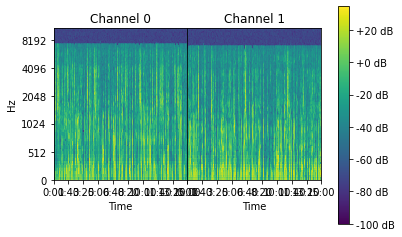

In [51]:
cfg = AudioConfig.BasicMelSpectrogram(n_fft=512)
a2s = AudioToSpec.from_cfg(cfg)
spec = a2s(audio)
spec.show()

In [55]:
def show_slice(s):
  specshow(s, **spec._all_show_args(show_y=0 == 0))

In [62]:
channel = spec[0]
window_size = 5f
windows = len(channel[0]) // window_size

# Pretty sure this only works because window_size fits into len(channel[0]) perfectly
# Split into vertical slices
slices = [channel.narrow(1, n * window_size, window_size) for n in range(windows)]
len(slices), slices[0].shape

(31008, torch.Size([128, 5]))

In [66]:
averages = []
for i, slice in enumerate(slices[:-1]):
    averages.append(np.mean([slices[i].numpy(), slice.numpy()]))
len(averages)

31007

In [67]:
df = pd.DataFrame({
  'x': averages,
  'n': range(len(slices) - 1),
})

fig = px.scatter(df, x='x', color='n')
fig.show()

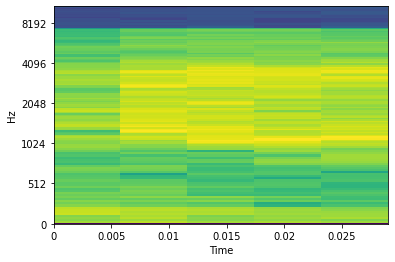

In [68]:
show_slice(slices[87].numpy())